# Load Important Libraries and Digit Dataset

In [1]:
import numpy as np
from sklearn import datasets, svm, metrics, model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import torchvision.datasets as dsets
import cv2
from PIL import ImageOps 

In [2]:
digits = datasets.load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [3]:
# Size of the images and number of images in the dataset
print(digits.images.shape)
print(digits.target.shape)

sampleImage = digits.images[0]
sampleImageValue = digits.target[0]

print(sampleImage)
print(sampleImageValue)

(1797, 8, 8)
(1797,)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0


In [4]:
# Target values of the dataset
target = digits.target

# Plotting Samples

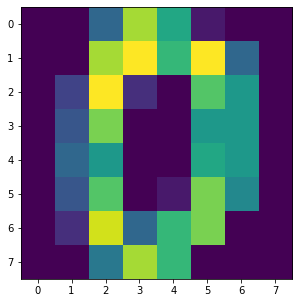

In [5]:
plt.figure(figsize=(5,5))
plt.imshow(sampleImage)
plt.show()

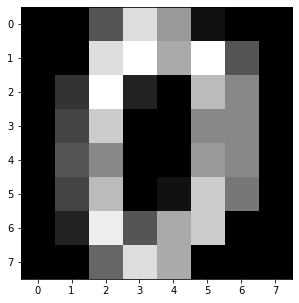

In [6]:
plt.figure(figsize=(5,5))
plt.imshow(sampleImage, cmap='gray')

In [7]:
print(digits.images.shape)
flatten_digits = digits.images.reshape((len(digits.images), -1))
print(flatten_digits.shape)

(1797, 8, 8)
(1797, 64)


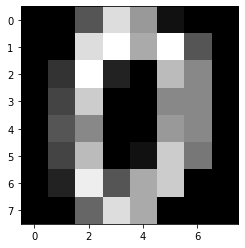

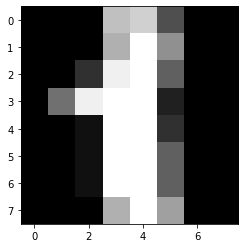

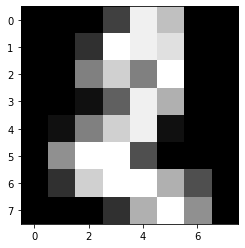

In [8]:
#_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 4))
count = 0
for image in digits.images: 
    count += 1
    plt.imshow(image, cmap=plt.cm.gray)
    plt.show()
    if count >= 3:
        break    

# Train and Test Split

In [9]:
# Splitting the dataset into train and test datasets 
xTrain, xTest, yTrain, yTest = train_test_split(flatten_digits, target, test_size=0.2)

In [10]:
accuracyList = []
modelList = []

# Hand-Written Classification with Logistic Regression

In [11]:
modelName = "Logistic Regression w/o Scaling"
modelList.append(modelName)

# Creating a logistic regression model 
logisticRegression = LogisticRegression(C=0.01, penalty='l1', solver='saga', tol=0.1, multi_class='multinomial')

# Fitting the regression model
logisticRegression.fit(xTrain, yTrain)

# Making prediction
yPrediction = logisticRegression.predict(xTest)

# Calculating accuracy and printing
accuracyLogisticRegression = logisticRegression.score(xTest, yTest)
accuracyList.append(accuracyLogisticRegression)
print("Accuracy without standardization: "+str(accuracyLogisticRegression))

Accuracy without standardization: 0.925


# Feature Scaling

In [12]:
scaler = StandardScaler()
xTrainScaled = scaler.fit_transform(xTrain)
xTestScaled = scaler.transform(xTest)

In [13]:
modelName = "Logistic Regression with Scaling"
modelList.append(modelName)

# Creating a logistic regression model 
logisticRegressionScaled = LogisticRegression(C=0.01, penalty='l1', solver='saga', tol=0.1, multi_class='multinomial')

# Fitting the regression model
logisticRegressionScaled.fit(xTrainScaled, yTrain)

# Making prediction
yPredictionScaled = logisticRegressionScaled.predict(xTestScaled)

# Calculating accuracy and printing
accuracyLogisticRegressionScaled = logisticRegressionScaled.score(xTestScaled, yTest)
accuracyList.append(accuracyLogisticRegressionScaled)
print("Accuracy with standardization: "+str(accuracyLogisticRegressionScaled))

Accuracy with standardization: 0.8027777777777778


In [14]:
# Obtaining confusion matrix for different digits
labelNames = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
confusionMatrix = confusion_matrix(yTest, yPredictionScaled, labels=labelNames)
confusionMatrix

array([[35,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1, 22,  3,  0,  0,  0,  0,  0,  0,  2],
       [ 0,  0, 30,  2,  0,  0,  0,  1,  0,  0],
       [ 1,  0,  1, 34,  0,  0,  0,  1,  0,  0],
       [ 1,  3,  0,  0, 28,  0,  0,  5,  0,  0],
       [ 0,  0,  0,  0,  0, 31,  0,  5,  0,  0],
       [ 1,  0,  0,  0,  1,  0, 34,  0,  0,  0],
       [ 1,  0,  0,  0,  1,  0,  0, 42,  0,  0],
       [ 1,  9,  3,  4,  1,  1,  3,  6,  4,  6],
       [ 0,  0,  0,  0,  0,  0,  1,  6,  0, 29]], dtype=int64)

* Rows represent the true values and columns represent the predictions

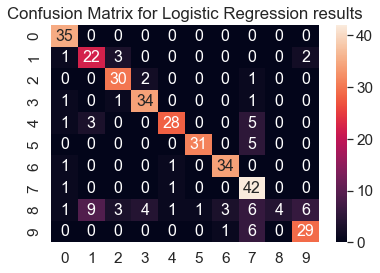

In [15]:
# Visualizing it as a heatmap 
confusionMatrix = pd.DataFrame(confusionMatrix)
sns.set(font_scale=1.4) # for label size
sns.heatmap(confusionMatrix, annot=True, annot_kws={"size": 16}) # font size
title = "Confusion Matrix for Logistic Regression results"
plt.title(title)
plt.show()

# Apply K-Fold

In [16]:
#define cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle=True) 

In [17]:
modelName = "Logistic Regression with K-Fold"
modelList.append(modelName)

# Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(flatten_digits)
Y = target.copy()

# Creating a logistic regression model 
logisticRegressionKFold = LogisticRegression(C=0.01, penalty='l1', solver='saga', tol=0.1, multi_class='multinomial')
accuracyKFold = model_selection.cross_val_score(logisticRegressionKFold,X, Y, cv=cv, scoring='accuracy')
accuracyKFold
accuracyList.append(accuracyKFold)

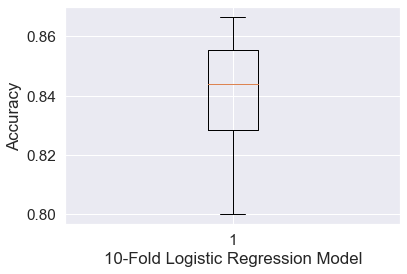

In [18]:
plt.boxplot(accuracyKFold)
plt.ylabel('Accuracy')
plt.xlabel('10-Fold Logistic Regression Model')
plt.show()

# Hand-Written Classification with SVM

In [19]:
modelName = "Support Vector Machine"
modelList.append(modelName)

# Creating a Support Vector Machine Classifier 
svmClassifier = svm.SVC(gamma='scale')

# Fitting the model
svmClassifier.fit(xTrain, yTrain)

# Making prediction
yPredictionSVM = svmClassifier.predict(xTest)

# Calculating accuracy and printing
accuracySVM = accuracy_score(yTest, yPredictionSVM)
accuracyList.append(accuracySVM)
print("Accuracy Support Vector Machine: "+str(accuracySVM))

Accuracy Support Vector Machine: 0.9861111111111112


In [20]:
# Obtaining confusion matrix for different digits
labelNames = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
confusionMatrix = confusion_matrix(yTest, yPredictionSVM, labels=labelNames)
confusionMatrix

array([[35,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 35,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  0, 36,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 44,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 37,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 35]], dtype=int64)

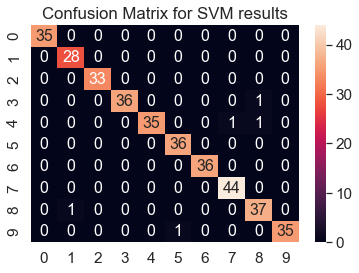

In [21]:
# Visualizing it as a heatmap 
confusionMatrix = pd.DataFrame(confusionMatrix)
sns.set(font_scale=1.4) # for label size
sns.heatmap(confusionMatrix, annot=True, annot_kws={"size": 16}) # font size
title = "Confusion Matrix for SVM results"
plt.title(title)
plt.show()

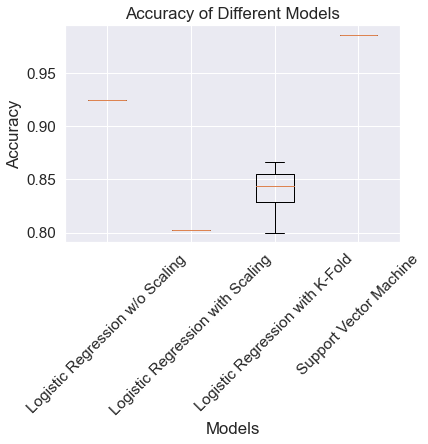

In [22]:
# Plot all 4 model implementation with their accuracy
ax = plt.boxplot(x = accuracyList)
plt.xticks([1, 2, 3,4],modelList, rotation=45)
plt.title('Accuracy of Different Models')
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.show()